# TUGAS 3
Klasifikasi data iris menggunakan k-NN

### k-NN (K-Nearest Neighbors)
KNN termasuk algoritma supervised learning. Algoritma ini menggunakan klasifikasi terhadap suatu objek berdasarkan data jarak tetangga (neighbor) terdekatnya atau bisa dikatakan k =1. Tujuan dari algoritma ini adalah mengklasifikasi objek baru berdasakan atribut dan data training. Untuk menghitung dekat atau jauhnya tetangga biasanya dihitung berdasarkan jarak Eucledian.

In [ ]:
#import packages yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import dataset
dataset_url = "https://raw.githubusercontent.com/ranianuraini/datamining/main/IRIS.csv"
#create dataframe
df = pd.read_csv(dataset_url)

In [ ]:
#show first 10 rows
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#tampilkan informasi dari dataset yang dimasukkan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Dari informasi dataset diatas terdapat 5 kolom, yakni sepal_length, sepal_width, petal_length, petal_width, dan species. jenis data float dan object, setiap kolom memiliki 150 data dan tidak ada data yang kosong (null).

selanjutnya menentukan variabel independen (variabel yang mempengaruhi) dari data sehingga, menghapus variabel dependen yaitu “species”.

In [ ]:
X = df.iloc [:, :-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#menampilkan data variabel dependen
Y = df.iloc [:, 4]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

pada kolom species merupakan jenis categorical maka kita ubah menjadi seperti ini :
* setosa 0
* versicolor 1
* virginica 2

Proses selanjutnya **Dummy Encoding**. **Dummy Encoding** adalah proses mengubah variabel kategorikal menjadi variabel numerikal.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species']= label_encoder.fit_transform(df['species']) 
df['species'].unique()
label_encoder_y = LabelEncoder()
Y= label_encoder_y.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#import package untuk melakukan klasifikasi KNN
from sklearn.model_selection import train_test_split

In [ ]:
#membagi data
#0,3 disini artinya pembagian data training dan testing dibagi menjadi 70/30.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
#import package untuk mengubah skala data
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

In [ ]:
#import package untuk klasifikasi KNN dengan import KNeighborsClassifier dari package sklearn
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
#input data train pada fungsi klasifikasi
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
#menentukan hasil prediksi dari X_test
y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
#menentukan probabilitas dari hasil prediksi
classifier.predict_proba(X_test)

array([[0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0.6

In [ ]:
#import package confussion matrix
from sklearn.metrics import  classification_report,confusion_matrix

#tampilkan hasil dari confussion matrix
print(confusion_matrix(Y_test,y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
#tampilkan hasil ketepatan nilai precision , recall 
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
#menampilkan accuracy
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(Y_test, y_pred)*100

print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal 100.0%


<Figure size 432x288 with 0 Axes>

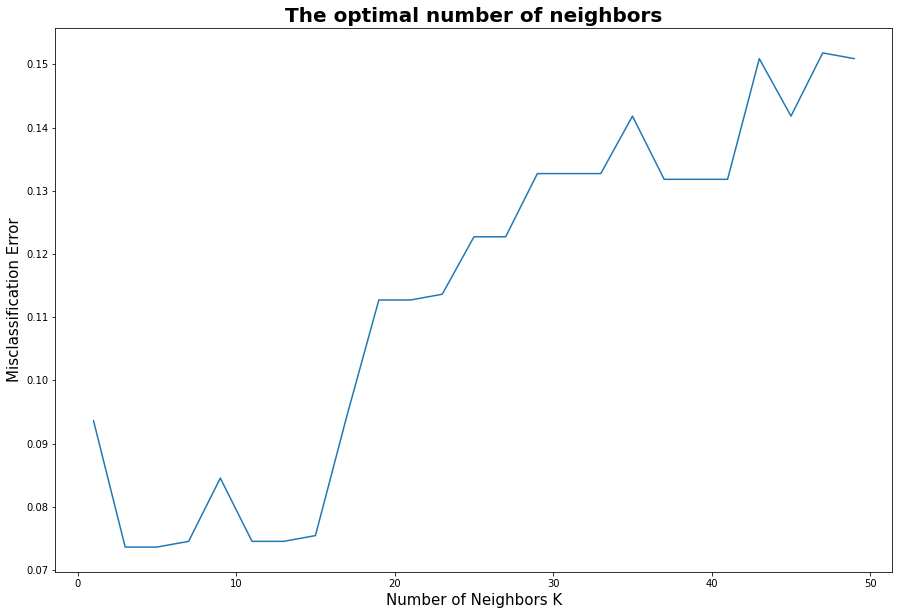

In [ ]:
#import cross validation
from sklearn.model_selection import cross_val_score

#membuat list of K for KNN
k_list = list(range(1,50,2))
cv_scores = []

# melakukan 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

In [ ]:
#mencari K terbaik
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.
